<a href="https://colab.research.google.com/github/shivckr/Python-Projects-/blob/master/Premier_League_analysis_with_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import python libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline

This dataset can be downloaded from kaggle: https://www.kaggle.com/zaeemnalla/premier-league#stats.csv

The data was acquired from the Premier League website and is representative of seasons 2006/2007 to 2017/2018. 

In [0]:
train_data_link  = "https://raw.githubusercontent.com/shivckr/border/master/stats.csv" 
test_data_link = "https://raw.githubusercontent.com/shivckr/border/master/results.csv"

In [0]:
# loading dataset into dataframe
train_data = pd.read_csv(train_data_link)
test_data  = pd.read_csv(test_data_link)


In [0]:
#EDA
#train_data.head(10)
team_summary =train_data.groupby("team").sum()
# team_summary.head()



In [0]:
#team staristics 
# team_summary.describe()

Text(0, 0.5, 'Premier League Goals')

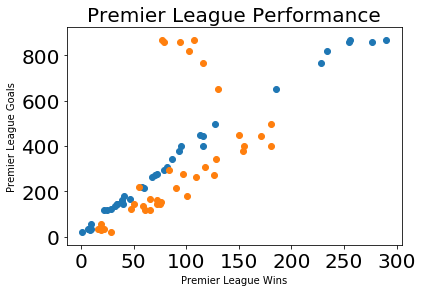

In [8]:
#possible cluster with scatter plot  
plt.scatter(team_summary.wins, team_summary.goals)
plt.scatter(team_summary.losses, team_summary.goals)
plt.title('Premier League Performance',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Premier League Wins')
plt.ylabel('Premier League Goals')

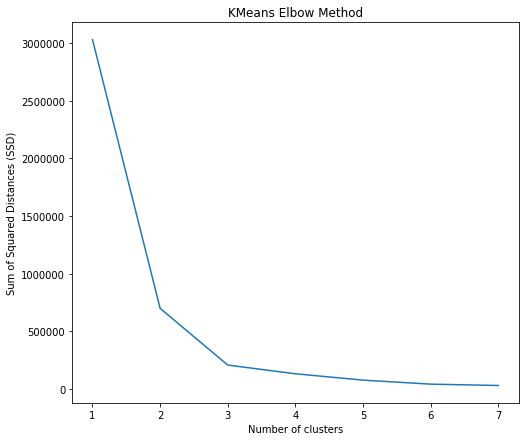

In [12]:
#decide no. of cluster 

x = team_summary[['wins','goals']]

def no_clusters(data,a,b):
    '''to find the number of clusters for the k means algorithm'''
    SSE = []
    clusters = range(a,b)
    for k in clusters:
        SSE.append(KMeans(n_clusters=k).fit(data).inertia_)
    plt.plot(clusters, SSE)
    plt.xticks(clusters)
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of Squared Distances (SSD)')
    plt.title('KMeans Elbow Method')
    plt.rcParams['figure.figsize']=(8,7)
    
no_clusters(x,1,8)

In [0]:
#fit data into Kmeans model
kM2 = KMeans(n_clusters=2, random_state = 1)
team_summary['KMeans2'] = kM2.fit_predict(x)

In [16]:
team_summary.KMeans2.count()

39

In [23]:
team_summary.head()

,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,att_pen_goal,att_freekick_goal,att_ibox_goal,att_obox_goal,goal_fastbreak,total_offside,clean_sheet,goals_conceded,saves,outfielder_block,interception,total_tackle,last_man_tackle,total_clearance,head_clearance,own_goals,penalty_conceded,pen_goals_conceded,total_pass,total_through_ball,total_long_balls,backward_pass,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,Kmv,KMeans2
team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AFC Bournemouth,34.0,50.0,145.0,160.0,5.0,1381.0,461.0,37.0,20.0,13.0,1.0,128.0,18.0,2.0,171.0,23.0,195.0,324.0,416.0,1467.0,1821.0,5.0,3080.0,1665.0,6.0,14.0,8.0,50553.0,121.0,7244.0,7449.0,2084.0,632.0,73726.0,80.0,12.0,1268.0,5.0,131.0,53.0,0,0
Arsenal,255.0,94.0,861.0,685.0,40.0,7339.0,2652.0,206.0,143.0,52.0,18.0,765.0,97.0,60.0,1071.0,171.0,481.0,563.0,1155.0,7380.0,9298.0,112.0,12858.0,6406.0,21.0,64.0,51.0,245685.0,2304.0,22134.0,22985.0,10270.0,2953.0,347034.0,480.0,41.0,6011.0,11.0,678.0,269.0,1,1
Aston Villa,113.0,150.0,449.0,651.0,26.0,4561.0,1467.0,101.0,89.0,36.0,15.0,365.0,84.0,41.0,898.0,96.0,554.0,344.0,1533.0,5973.0,8143.0,58.0,13835.0,6831.0,24.0,54.0,46.0,137945.0,480.0,21792.0,13225.0,8762.0,2061.0,221450.0,202.0,59.0,3976.0,5.0,585.0,231.0,0,0
Birmingham City,29.0,48.0,121.0,201.0,7.0,1267.0,419.0,24.0,19.0,10.0,9.0,98.0,23.0,6.0,267.0,23.0,167.0,0.0,515.0,1865.0,2388.0,14.0,4905.0,2609.0,6.0,17.0,16.0,38206.0,241.0,7309.0,2221.0,2294.0,529.0,64871.0,30.0,20.0,1371.0,1.0,226.0,67.0,0,0
Blackburn Rovers,72.0,97.0,277.0,411.0,28.0,2876.0,927.0,70.0,65.0,22.0,9.0,233.0,44.0,10.0,625.0,50.0,354.0,22.0,813.0,3569.0,4668.0,48.0,9215.0,4109.0,11.0,36.0,25.0,76513.0,346.0,13459.0,3492.0,4842.0,1120.0,127563.0,81.0,42.0,2076.0,8.0,327.0,156.0,0,0


In [0]:
#sns.factorplot(team_summary, kind="count", x= "Kmv", y=team_summary.KMeans2.count())